In [1]:
using Plots, Distributions

# include main code
include("../src/functions.jl")

hjbsolver_delta1 (generic function with 1 method)

In [2]:


function run_example()
    beta1, beta2, beta3 = 5, 6, 4
    eta1 = eta2 = 0.25
    p = 120.0
    k = (0.05 / 1.25) * p
    δ = 0.15
    ER1(a1) = 2.4 * a1
    ER2(a2) = 4 - (2.828427125 * sqrt(a2) + 4) * exp(-0.7071067812 * sqrt(a2))

    (1 + eta1) * (beta1 * ER1(1) + beta2 * 4 + beta3 / 0.25) +
    (1 + eta2) * (beta1 * ER1(1) + beta2 * 4 + beta3 / 0.5)

    F1 = SampleDistFun(x -> cdf(Gamma(3, 0.8), x), 40.0, 0.005)
    #F2 = SampleDistFun(x -> cdf(Weibull(0.5, 2), x), 40.0, 0.005)
    F2(x) = 1 - exp(-0.7071067812 * sqrt(x))
    FR1(x, a1) = F1(x / a1)

    function FR2(x, a2)
        if x < a2
            return F2(x)
        else
            return 1.0
        end
    end

    function FR12(x, a1, a2)
        if a1 == 0.5
            a1 = 0.5000001
        end
        if x < a2
            return 1 - (2 * a1 * exp(-0.25 * x / a1) - exp(-0.5 * x)) / (2 * a1 - 1)
        else
            return 1 -
                   (2 * a1 - exp((0.25 / a1 - 0.5) * a2)) * exp(-0.25 * x / a1) /
                   (2 * a1 - 1)
        end
    end

    FR(r, x) =
        0.3333333333333333 * FR1(x, r[1]) +
        0.4 * FR2(x, r[2]) +
        0.26666666666666666 * FR12(x, r[1], r[2])
    ER1(a1) = 2.4 * a1
    ER2(a2) = 4 - (2.828427125 * sqrt(a2) + 4) * exp(-0.7071067812 * sqrt(a2))
    ER12(a1, a2) = 4 * a1 + 2 * (1 - exp(-0.5 * a2))
    ER(r) =
        0.3333333333333333 * ER1(r[1]) +
        0.4 * ER2(r[2]) +
        0.26666666666666666 * ER12(r[1], r[2])

    EnoR = ER([1.0, 100000.0])

    res = bisection_hjbsolver(
        a=0,
        b=p / δ^2,
        max_it=20,
        NRe=2,
        β=5.0 + 6.0 + 4.0,
        FR=FR,
        ER=ER,
        EnoR=EnoR,
        partition=(0.0, 19.0, 200.0, 500.0),
        Δx=0.05,
        SearchRanges=([(0.0, 1.0), (0.2, 200.0)], [(0.0, 1.0), (1.0, 200.0)]),
        η=0.25,
        η1=0.3,
        δ=0.15,
        MaxEvals=2500,
        p=p,
        L=300,
    )
    return res
end

run (generic function with 1 method)

In [3]:
res = run_example();

(0, 2666.666666666667, 5333.333333333334)
(0, 1333.3333333333335, 2666.666666666667)
(0, 666.6666666666667, 1333.3333333333335)
10%, V(50.0) = 3040.0   Time = 29.7 seconds
20%, V(100.0) = 4691.2   Time = 115.0 seconds
(0, 333.33333333333337, 666.6666666666667)
10%, V(50.0) = 1487.3   Time = 31.5 seconds
20%, V(100.0) = 2189.4   Time = 116.0 seconds
30%, V(150.0) = 2995.0   Time = 271.0 seconds
40%, V(200.0) = 4025.3   Time = 489.0 seconds
50%, V(250.0) = 5403.4   Time = 489.0 seconds
60%, V(300.0) = 7314.0   Time = 489.0 seconds
(0, 166.66666666666669, 333.33333333333337)
10%, V(50.0) = 709.18   Time = 37.1 seconds
20%, V(100.0) = 930.21   Time = 133.0 seconds
30%, V(150.0) = 1057.6   Time = 280.0 seconds
(166.66666666666669, 250.00000000000003, 333.33333333333337)
10%, V(50.0) = 1099.1   Time = 36.2 seconds
20%, V(100.0) = 1563.1   Time = 132.0 seconds
30%, V(150.0) = 2035.1   Time = 297.0 seconds
40%, V(200.0) = 2565.7   Time = 507.0 seconds
50%, V(250.0) = 3192.4   Time = 507.0 seco

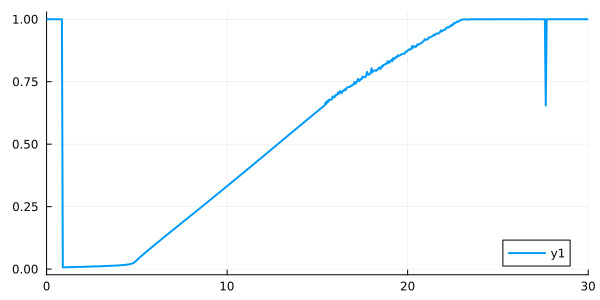

In [4]:
plot(res[end][1], res[end][4][:, 1], size = (600, 300), xlims = (0, 30), linewidth=2)

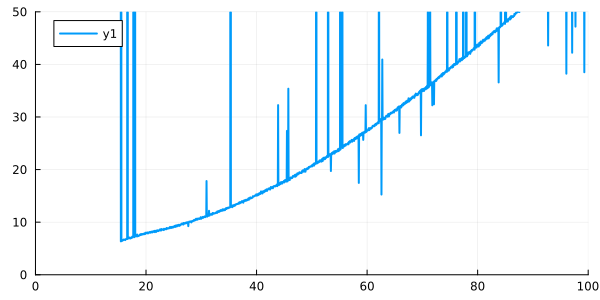

In [5]:
plot(res[end][1], res[end][4][:, 2], size = (600, 300), xlims = (0, 100), ylims = (0, 50), linewidth=2)

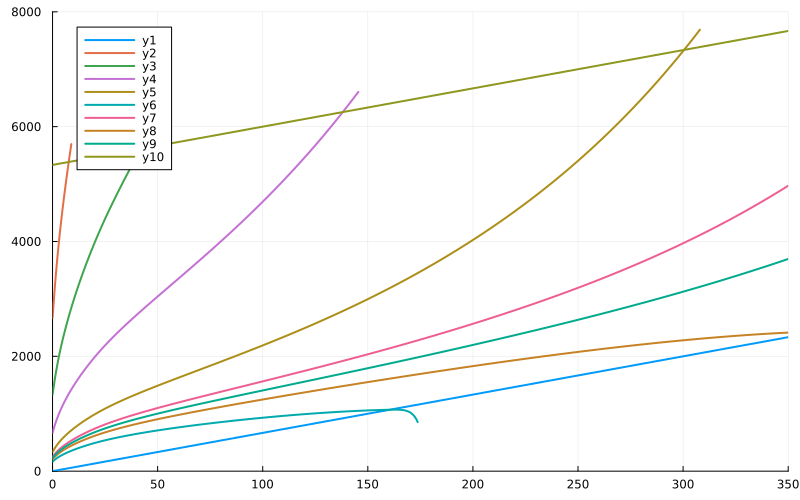

In [13]:
p = 120.0;
δ = 0.15;
plot(x -> x / δ, xlims=(0, 350), size=(800, 500),ylims=(0,8000), linewidth=2)
for i = 1:length(res)
    plot!(res[i][1], res[i][2], linewidth=2)
end
plot!(x -> x / δ + p / δ^2,  linewidth=2)